<a href="https://colab.research.google.com/github/hamihoshiyama/wild_fire/blob/main/wildfire_model_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/data.csv")

<ipython-input-28-d77972d3300b>:2: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,26,27,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/data.csv")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
df = df.rename(columns = {'FIRE_YEAR':'fire_year',
                         'DISCOVERY_DATE':'disc_date',
                         'DISCOVERY_DOY':'disc_doy',
                         'NWCG_GENERAL_CAUSE':'cause',
                         'FIRE_SIZE' : 'fire_size',
                         'FIRE_SIZE_CLASS' : 'fire_class',
                         'LATITUDE':'latitude',
                         'LONGITUDE':'longitude',
                         'STATE':'state',
                          'DISCOVERY_TIME': 'time'}).rename_axis('id')



df['disc_date'] = pd.to_datetime(df['disc_date'], errors='coerce', format='%m/%d/%Y')
df['month'] = df['disc_date'].dt.month
df['day'] = df['disc_date'].dt.day
ca_df = df[df['state'] == 'CA']
ca_df = ca_df[['fire_class', 'latitude', 'longitude', 'state', 'month', 'day', 'time']]
ca_df = ca_df.dropna()


samples_per_class = 20000
ca_df = ca_df.groupby('fire_class', group_keys=False).apply(
    lambda x: x.sample(n=samples_per_class, replace=True, random_state=42)
)

ca_df = ca_df.reset_index(drop=True)
ca_df.head()
#ca_df = df[df['state'] == 'CA']




<ipython-input-29-dac39ca964ce>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ca_df = ca_df.groupby('fire_class', group_keys=False).apply(


,fire_class,latitude,longitude,state,month,day,time
0,A,38.308333,-119.777778,CA,10,21,1730.0
1,A,38.614444,-119.664167,CA,7,8,1900.0
2,A,38.751351,-121.309354,CA,3,10,1543.0
3,A,34.049420,-117.691173,CA,8,14,2008.0
4,A,40.710667,-122.337383,CA,1,24,2145.0


<Axes: title={'center': 'latitude'}, xlabel='fire_class', ylabel='latitude'>

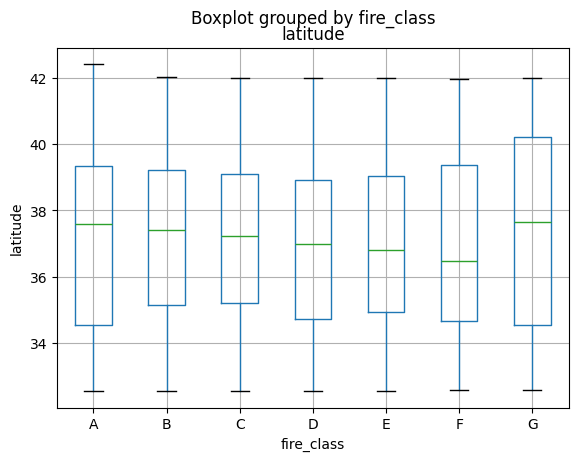

In [17]:
ca_df.boxplot(column='latitude', by='fire_class',xlabel = "fire_class", ylabel = "latitude")


<Axes: title={'center': 'longitude'}, xlabel='fire_class', ylabel='longitude'>

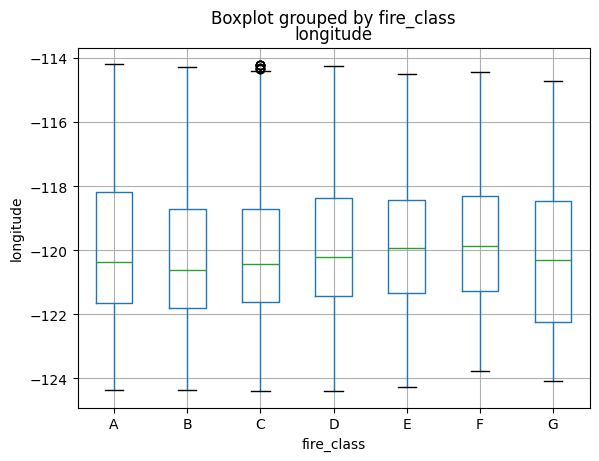

In [18]:
ca_df.boxplot(column='longitude', by='fire_class',xlabel = "fire_class", ylabel = "longitude")

<Axes: title={'center': 'month'}, xlabel='fire_class', ylabel='Month'>

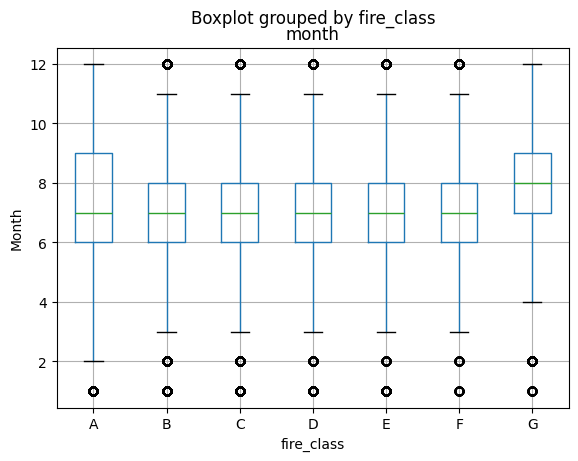

In [19]:
ca_df.boxplot(column='month', by='fire_class',xlabel = "fire_class", ylabel = "Month")

<Axes: title={'center': 'day'}, xlabel='fire_class', ylabel='day'>

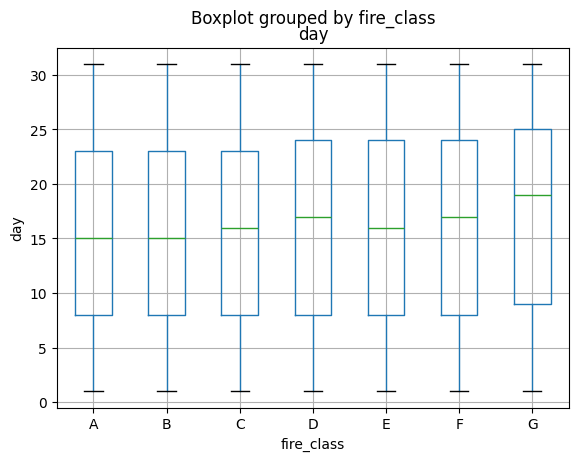

In [20]:
ca_df.boxplot(column='day', by='fire_class',xlabel = "fire_class", ylabel = "day")

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Select features and target
features = ['latitude', 'longitude', 'month', 'day']
target = 'fire_class'

# Prepare data
X = ca_df[features]
y = ca_df[target]

# Encode the target if it's categorical
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest Classifier with class_weight balanced
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

# Output results
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print("R2 Score:", R2)
print("Mean Squared Error (MSE):", MSE)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

R2 Score: 0.9162994881703879
Mean Squared Error (MSE): 0.3325714285714286
Accuracy: 0.8589285714285714
Classification Report:
              precision    recall  f1-score   support

           A       0.64      0.61      0.62      3965
           B       0.63      0.54      0.58      4099
           C       0.80      0.87      0.84      4023
           D       0.95      1.00      0.98      4057
           E       0.98      1.00      0.99      3979
           F       0.98      1.00      0.99      3943
           G       0.99      1.00      0.99      3934

    accuracy                           0.86     28000
   macro avg       0.85      0.86      0.86     28000
weighted avg       0.85      0.86      0.85     28000



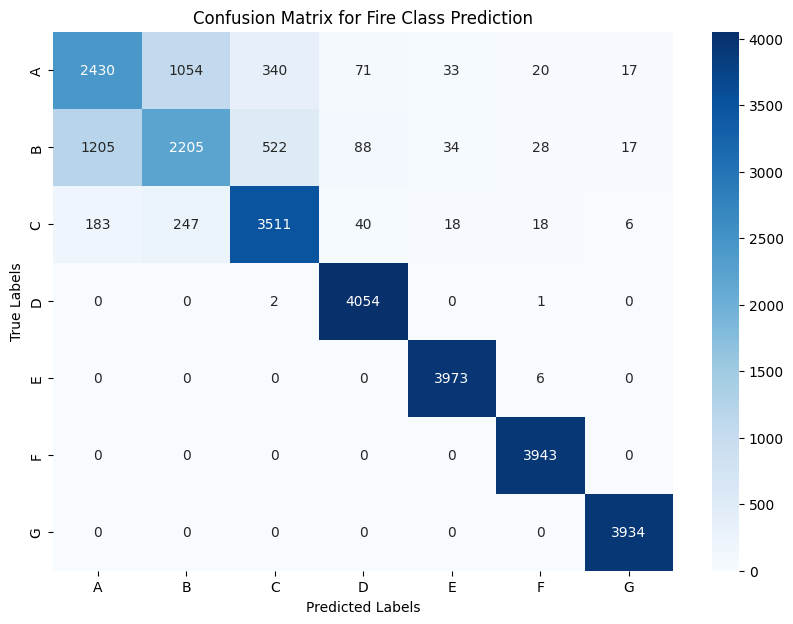

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Plot the Confusion Matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Fire Class Prediction')
plt.show()

In [26]:
import joblib

# Save the trained pipeline (including preprocessor and Random Forest model)
joblib.dump(rf, 'fire_class_model.pkl')



from google.colab import files

# Download the saved model
files.download('fire_class_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>